# Διαμόρφωση Πλάτους - Amplitude Modulation

Στην διαμόρφωση Πλάτους, η πληροφορία αποτυπώνεται στο πλάτος του διαμορφωμένου σήματος

## Διαμόρφωση πλάτους διπλής πλευρικής ζώνης με συνολικό φέρον <br> Double Side Band-Amplitude Modulation-Total Carrier (DSB - AM-TC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (20,3)
matplotlib.rcParams["text.usetex"]
matplotlib.rcParams['mathtext.fontset'] = 'cm'
legend_properties = {'weight':'bold'}

### Το σήμα πληροφορίας
Έστω ότι το σήμα πληροφορίας είναι το σήμα:

$ m(t) = 2 \cdot cos(2\pi f_m \cdot t) $ 

με συχνότητα $ f_m = 0.125 $ Hz και πλάτος $ a = 2 $ 

In [ ]:
fm = 0.125
a = 2

t = np.linspace(0,20, 1000)
m = lambda t: a*np.cos(2*np.pi*fm*t)
plt.plot(t, m(t))
plt.grid()
plt.title('m(t): Το Αρχικό Σήμα - Σήμα Πληροφορίας')
plt.xlabel('t')
plt.show()

### Το σήμα του φέροντος
Θεωρούμε σήμα φέροντος

$ c(t) = 4 \cdot cos(2\pi f_c \cdot t) $

με συχνότητα $ f_c = 2 $ Hz

In [ ]:
Ac = 4
fc = 2

c = lambda t:Ac*np.cos(2*np.pi*fc*t)
plt.plot(t, c(t))
plt.grid()
plt.title('c(t): Φέρον Σήμα')
plt.xlabel('t')
plt.show()

### Διαμορφωμένο σήμα
Το διαμορφωμένο σήμα δίνεται από τον τύπο:

$ x(t) = [A_c + m(t)] \cdot cos(2 \pi f_c \cdot t) $

Στο παράδειγμά μας θα είναι: 

$ x(t) = [2 + 2 \cdot cos(2\pi\cdot0.125\cdot t)] \cdot cos(2 \pi \cdot 2 \cdot t) $

In [ ]:
x = lambda t:(Ac+m(t))*np.cos(2*np.pi*fc*t)
plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, abs(m(t)+Ac), label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

### Δείκτης διαμόρφωσης
Ως δείκτη διαμόρφωσης (modulation index) ορίζουμε το 

$ \mu = \frac{|min(m(t))|}{A_c} $

Η υπερδιαμόρφωση αφορά το φαινόμενο στο οποίο έχουμε παραμόρφωση της περιβάλλουσας, με αποτέλεσμα να χάνεται το σήμα πληροφορίας. Για να αποφευχθεί η υπερδιαμόρφωση (overmodulation), θα πρέπει $ \mu \le 1 $

In [ ]:
#modulation index μ
m_min = abs(min(m(t)))
modulationIndex_init = m_min/Ac
print('Μodulation index used above:', str(modulationIndex_init), '< 1')

### Υπερδιαμόρφωση
Μεταβάλλουμε το πλάτος του φέροντος, ώστε να προκαλέσουμε υπερδιαμόρφωση. Τα νέα δεδομένα τυπώνονται παρακάτω.

In [ ]:
print('Initial Ac:', str(Ac),'with modulation index:', str(modulationIndex_init))
Ac_new = 1
modulationIndex = m_min/Ac_new
print('New Ac:', str(Ac_new),'with modulation index:', str(modulationIndex))

#### Για μ > 1
Όπως φαίνεται στο παρακάτω γράφημα, η περιβάλλουσα δεν διατηρεί τα δεδομένα του αρχικού σήματος

In [ ]:
x_overmod = lambda t: (Ac_new+m(t))*np.cos(2*np.pi*fc*t)
plt.plot(t, x_overmod(t), label = 'Διαμορφωμένο σήμα με μ > 1')
plt.plot(t, abs(m(t)+Ac_new), label = 'Πληροφορία στο Διαμορφωμένο Σήμα', lw = 5, ls = '--')
plt.plot(t, m(t)+Ac_new, label = 'Προσδοκώμενη Πληροφορία')
plt.grid()
plt.title('Διαμορφωμένο Σήμα με μ = 2')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

#### Για μ < 1
Αν το μ προκύψει $ \le $ 1, δεν υπάρχει απώλεια πληροφορίας, όπως φαίνεται παρακάτω:

In [ ]:
print('Initial Ac:', str(Ac),'with modulation index:', str(modulationIndex_init))
Ac_new = 6
modulationIndex = m_min/Ac_new
print('New Ac:', str(Ac_new),'with modulation index:', str(modulationIndex))

In [ ]:
x_new = lambda t: (Ac_new+m(t))*np.cos(2*np.pi*fc*t)
# plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, x_new(t), label = 'Διαμορφωμένο Σήμα')
plt.plot(t, abs(m(t)+Ac_new), label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα  με μ = 0.333...')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

#### Στην οριακή περίπτωση για μ = 1

In [ ]:
modulationIndex = m_min/Ac
print('Initial Ac:', str(Ac),'with modulation index:', str(modulationIndex_init))
Ac_new = 2
modulationIndex = m_min/Ac_new
print('New Ac:', str(Ac_new),'with modulation index:', str(modulationIndex))

In [ ]:
x_new = lambda t: (Ac_new+m(t))*np.cos(2*np.pi*fc*t)
# plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, x_new(t), label = 'Διαμορφωμένο Σήμα στην οριακή περίπτωση που μ=1')
plt.plot(t, abs(m(t)+Ac_new), label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα με μ = 1')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

### Σύνοψη

* Σήμα πληροφορίας:     &emsp;  $ m(t) = 2 \cdot cos(0.25 \pi \cdot t) $ 
* Φέρον Σήμα:           &emsp;  $ c(t) = 4 \cdot cos(4 \pi \cdot t) $
* Διαμορφωμένο Σήμα:    &emsp;  $ x(t) = [2 + 2 \cdot cos(0.25 \pi \cdot t)] \cdot cos(4 \pi \cdot t) $

### Μετασχηματισμοί Fourier
Εκτελούμε τους μετασχηματισμούς Fourier για τα τρία παραπάνω σήματα και προκύπτουν τα εξής:

$ M(\omega) = 2 \pi(\delta(\omega - 0.25\pi) + \delta(\omega + 0.25\pi)) $

$ C(\omega) = 4 \pi(\delta(\omega - 4\pi) + \delta(\omega + 4\pi)) $

$ X(\omega) = 2 \pi(\delta(\omega - 4\pi) + \delta(\omega + 4\pi)) +  \pi(\delta(\omega - 4.25\pi) + \delta(\omega + 4.25\pi)) + \pi(\delta(\omega - 3.75\pi) + \delta(\omega + 3.75\pi)) $

Οι γραφικές παραστάσεις των παραπάνω φαίνονται παρακάτω:

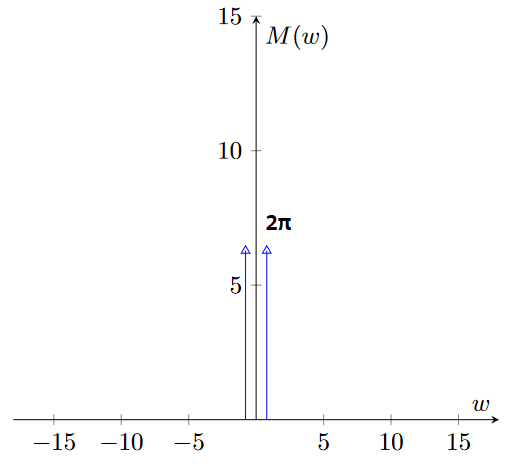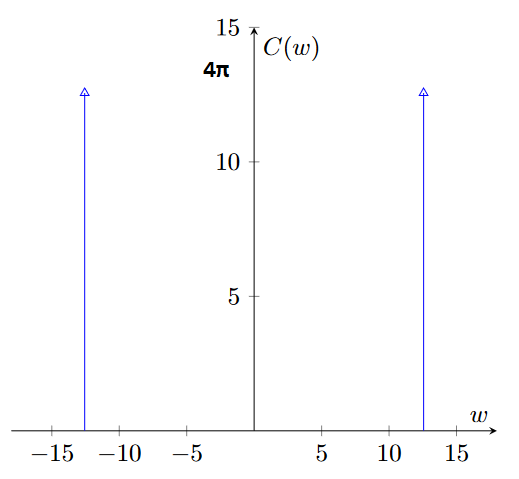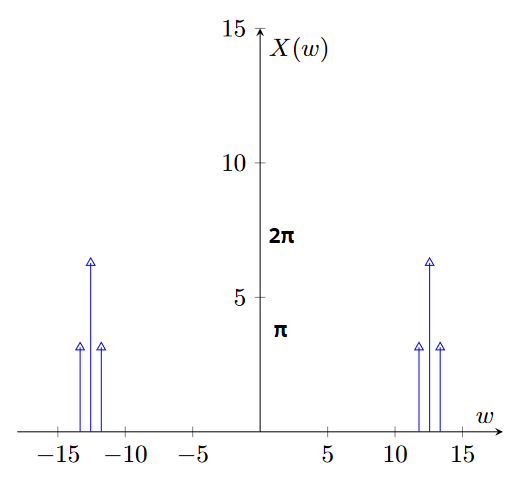

## Διαμόρφωση πλάτους διπλής πλευρικής ζώνης με καταργημένο φέρον <br> Double Side Band-Amplitude Modulation-Suppressed Carrier (DSB-AM-SC)
Σε αυτή την διαμόρφωση στο διαμορφωμένο σήμα απουσιάζει ο όρος $ A_c \cdot cos(2\pi f_c t) $, η συνιστώσα του φέροντος, οπότε το διαμορφωμένο σήμα έχει την μορφή:
$ x(t) = A_c\cdot m(t)cos(2\pi f_c t) $ 

Για σήμα πληροφορίας:

$ m(t) = 2 \cdot cos(2\pi f_m \cdot t) $

και φέρον:

$ c(t) = 4 \cdot cos(2\pi f_c \cdot t) $

έχουμε το διαμορφωμένο σήμα:

$ x(t) = 8 \cdot cos(2\pi f_m \cdot t) \cdot cos(2\pi f_c \cdot t) $

και η πληροφορία βρίσκεται στην καμπύλη $ A_c \cdot |m(t)| $, δηλαδή όταν το σήμα πληροφορίας αλλάζει πρόσημο, στο  διαμορφωμένο σήμα έχουμε αντιστροφή φάσης. Άρα η περιβάλλουσα διαφέρει από το αρχικό σήμα μας

In [ ]:
print(fm)
print(fc)
x = lambda t: 8*np.cos(2*np.pi*fm*t)*np.cos(2*np.pi*fc*t)
plt.plot(t, x(t), label = 'Διαμορφωμένο σήμα')
plt.plot(t, Ac*abs(m(t)), label = 'Πληροφορία στο Διαμορφωμένο Σήμα')
plt.grid()
plt.title('Διαμορφωμένο Σήμα')
plt.xlabel('t')
plt.legend(loc = 'lower right')
plt.show()

### Στο πεδίο της συχνότητας θα έχουμε:

$ M(\omega) = 2 \pi(\delta(\omega - 0.25\pi) + \delta(\omega + 0.25\pi)) $

$ X(\omega) = 4 \pi(\delta(\omega - 4.25 \pi) + \delta(\omega + 4.25 \pi)) + (\delta(\omega - 3.75 \pi) + \delta(\omega + 3.75\pi)) $

* Παρατηρούμε ότι στο διαμορφωμένο σήμα απουσιάζουν οι ώσεις στα $ \pm 2 \pi f_c = \pm 4 \pi $

## Διαμόρφωση πλάτους απλής πλευρικής ζώνης <br> Single Side Band-Amplitude Modulation (SSB-AM)

Για την ανάκτηση της πληροφορίας στον δέκτη απαιτείται η αποστολή της μίας εκ των δύο πλευρικών. Για αυτόν τον λόγο το σήμα $ m(t) $ μπορεί να διαμορφωθεί και με τον παρακάτω τρόπο:

$ x(t) = A_c \cdot m(t) * cos(2 \pi f_c t) \mp  A_c*\hat{m}(t)\cdot sin(2\pi f_ct)$, όπου:

* $ \hat{m}(t) $: ο μετασχηματισμός Hilbert του $ m(t) $
* Στο $ \mp $ χρησιμοποιούμε το + για να μεταδώσουμε την κάτω πλευρική, ενώ - για την άνω

## Διαμόρφωση πλάτους απλής πλευρικής ζώνης με κατάλοιπο <br> Vestigal Side Band-Amplitude Modulation (VSB-AM)
Λόγω της μη ιδανικής φύσης των φίλτρων, χρησιμοποιείται η παραπάνω διαμόρφωση στην οποία δεν αποκόπτεται ολόκληρη η μία  εκ των δύο πλευρικές ζώνες, αλλά παραμένει ένα μικρό κατάλοιπο.